In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import statsmodels.api as sm
import matplotlib.pyplot as plt



In [8]:
# Load the dataset
data = pd.read_csv('D:\\AI PROJECT\\test_clean.csv')

# Assuming 'price' is the target and the rest are features
features = data.columns.drop('price')
X = data[features]
y = data['price']


In [9]:
# Add a constant to the predictors and fit a GLM
X_with_const = sm.add_constant(X)
glm = sm.GLM(y, X_with_const, family=sm.families.Gaussian()).fit()

# Print the summary of the GLM
print(glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  427
Model:                            GLM   Df Residuals:                      421
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                      1.8889e+11
Method:                          IRLS   Log-Likelihood:                -6146.3
Date:                Sun, 11 Feb 2024   Deviance:                   7.9522e+13
Time:                        23:43:01   Pearson chi2:                 7.95e+13
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6473
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.064e+08   8.03e+07      1.325      0.1

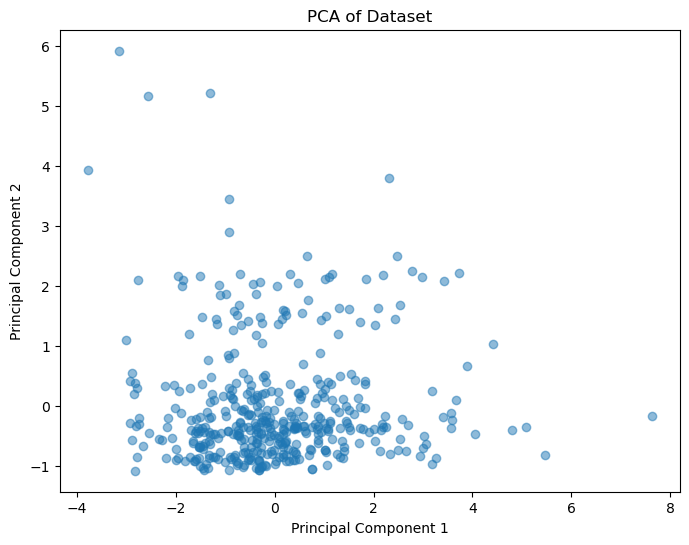

In [10]:
# Standardize the features before PCA
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Adjust components as needed
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()


D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You

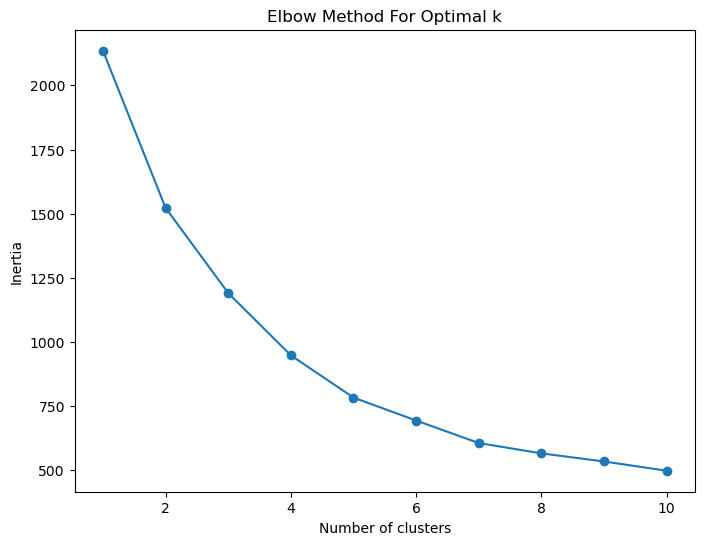

In [11]:
# Find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


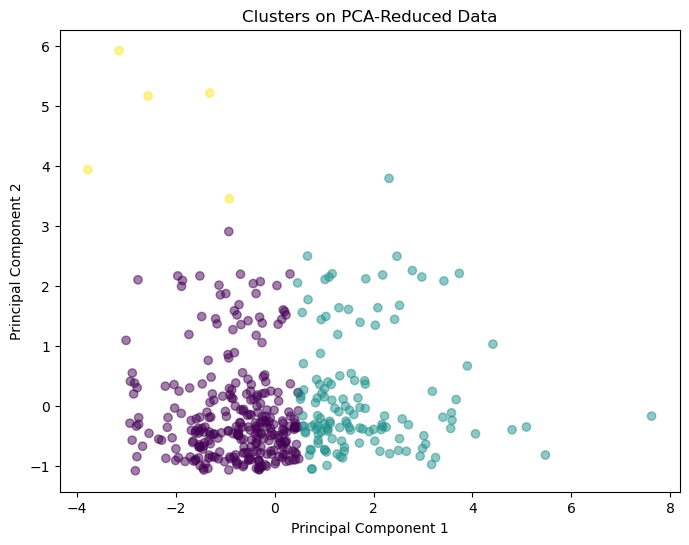

In [12]:
# Assuming the optimal number of clusters is found to be k
k_optimal = 3  # Replace with the actual optimal number
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters on the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters on PCA-Reduced Data')
plt.show()
